# Week 9 Hand-in

## Assignment

https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/09-Exercise.ipynb

## Status


Opgaverne er lavet i samarbejde med Sebastian Steen Lundby hansen & Sebastian James Bentley

# Imports

In [75]:
import requests
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb

## Download the data

In [11]:
Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

df = pd.read_csv(Data)

df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


## Solution for ex 2

In [41]:
df_honda = df[df['Identification.Make']=='Honda']
df_gasoline = df_honda[df_honda['Fuel Information.Fuel Type']=='Gasoline']
df_hpoutliers = df_gasoline[df_gasoline['Engine Information.Engine Statistics.Horsepower'] < df_gasoline['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)]
df_mpg_hp = df_hpoutliers[['Fuel Information.Highway mpg','Engine Information.Engine Statistics.Horsepower']]

scaler = preprocessing.MinMaxScaler()
names = df_mpg_hp.columns
d = scaler.fit_transform(df_mpg_hp)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.52381,0.548872
1,0.52381,0.548872
2,0.52381,0.548872
3,0.52381,0.548872
4,0.52381,0.548872


## Solution for ex 3

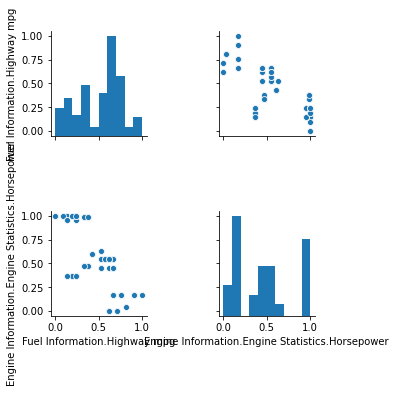

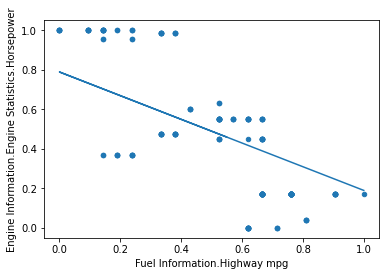

In [86]:
x = scaled_df['Engine Information.Engine Statistics.Horsepower']
y = scaled_df['Fuel Information.Highway mpg']
x_reshape = np.array(x).reshape(-1,1)
model = LinearRegression().fit(x_reshape, y)
#model.score(x_reshape, y)
coefficient = model.coef_
predict_y_fromx = model.predict([[1]])

sb.pairplot(scaled_df)
scaled_df.plot.scatter(x = 0, y = 1)

m, b = np.polyfit(x,y,1)
plt.plot(x,coefficient*x+b)

#plt.plot([x.min(), y.max()], [x.max(), y.min()])